# Clusterização - ONG

Uma ONG humanitária internacional está empenhada em combater a pobreza e fornecer às pessoas de países atrasados amenidades básicas e alívio durante desastres e calamidades naturais. De vez em quando, ela executa muitos projetos operacionais, juntamente com ações de advocacy para aumentar a conscientização, bem como para fins de financiamento.

Após os recentes programas de financiamento, eles conseguiram arrecadar cerca de US$ 10 milhões. Agora, o CEO da ONG precisa decidir como usar esse dinheiro de forma estratégica e eficaz. As questões significativas que surgem ao tomar essa decisão estão relacionadas principalmente à escolha dos países que mais precisam de ajuda.

E é aí que entramos como cientistas de dados. Nosso trabalho é categorizar os países usando alguns fatores socioeconômicos e de saúde que determinam o desenvolvimento geral do país. Em seguida, precisamos sugerir os países nos quais o CEO mais precisa se concentrar.

O dataset possui as seguintes colunas:

* country: nome do país
* child_mort: taxa de mortalidade infantil
* exports:taxa de exportação de bens e serviços
* health: total gasto com saúde
* imports: importação de bens e serviços
* Income: renda per capita
* Inflation: indice de inflação
* life_expec: expectativa de vida
* total_fer: taxa de fecundidade (estimativa da quantidade de filhos que uma 
* mulher teria ao longo de sua vida reprodutiva)
* gdpp: produção economica de um país (PIB)




In [57]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
country = pd.read_csv('/content/drive/MyDrive/Colab/Data Science/Datasets/country.csv')

In [60]:
# verificando os dados

country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [61]:
# organizando os dados pelo PIB

country.sort_values(by='gdpp', ascending=False).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400


In [62]:
# verificando o tamanho do dataset

country.shape

(167, 10)

In [63]:
# verificando valores nulos

country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [64]:
# verificando os tipos de dados 

country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


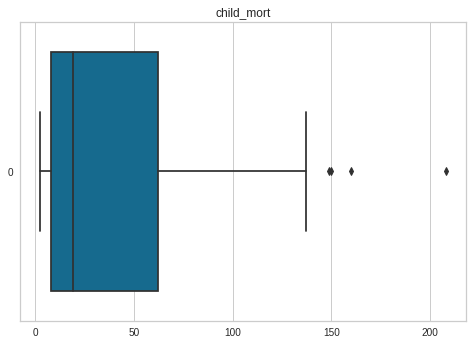

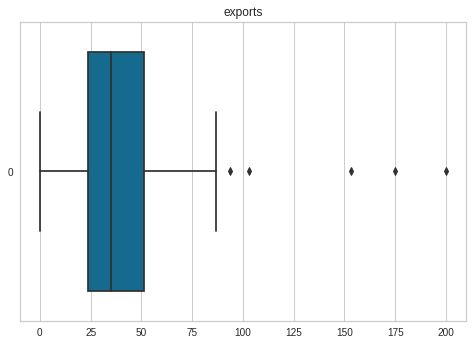

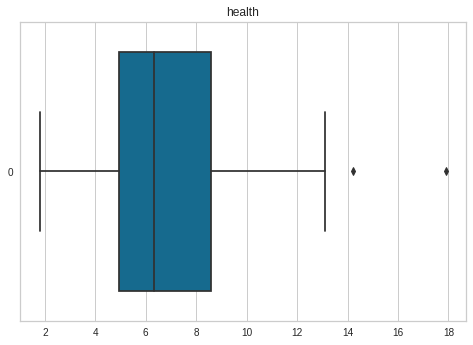

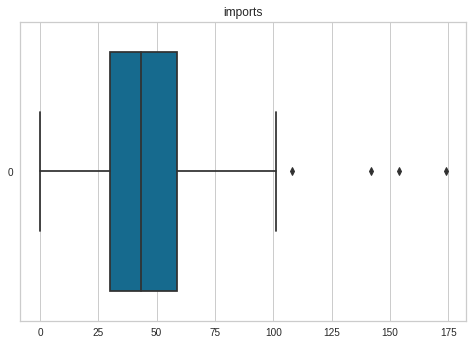

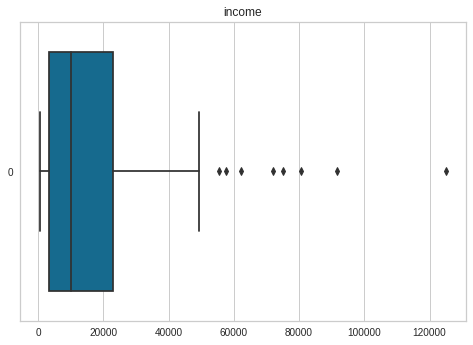

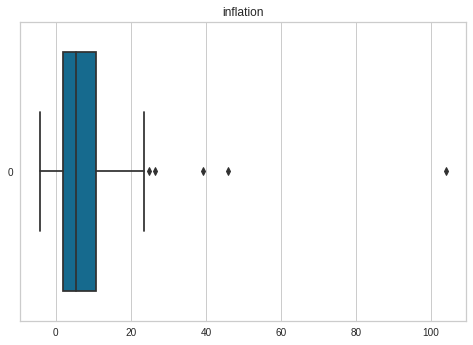

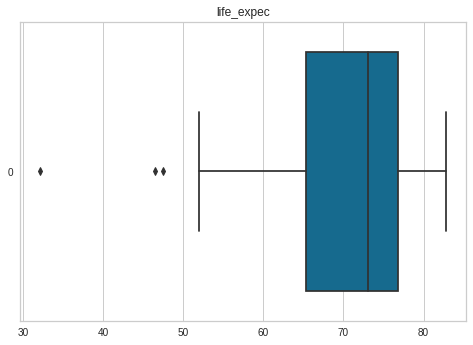

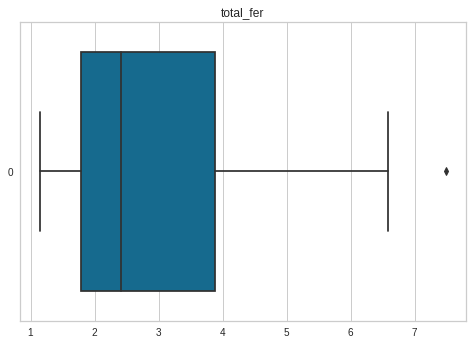

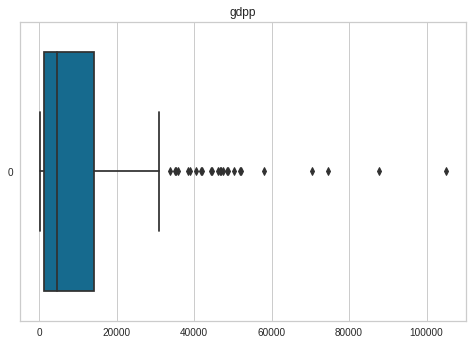

In [65]:
# verificando outliers de todas as colunas

for col in country.columns[1:]:
  sns.boxplot(data=country[col],orient='h')
  plt.title(col)
  plt.show()

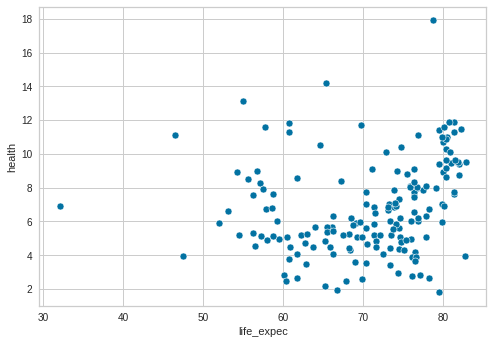

In [66]:
# verificando a expectativa de vida pelo investimento em saúde

sns.scatterplot(x='life_expec', y='health', data=country)
plt.show()

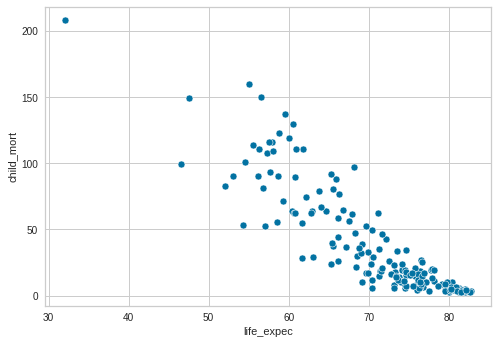

In [67]:
# verificando a expectativa de vida por mortalidade infantil

sns.scatterplot(x='life_expec', y='child_mort', data=country)
plt.show()

## Iniciando a Clusterização

In [68]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
# precisamos padronizar todos os valores numéricos, ou seja, menos o 'country'

countries_sel  = country.iloc[:, 1:]

In [71]:
countries_sel 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [72]:
# fitando o std no countries

scaler = StandardScaler()
countries_scaled  = scaler.fit_transform(countries_sel)
countries_scaled 

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [73]:
# precisamos transformar esse vetor de valores em um dataframe

countries_scaled = pd.DataFrame(countries_scaled, columns=countries_sel.columns)
countries_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [74]:
# utilizando o KMEANS

from sklearn.cluster import KMeans

In [75]:
def elbow(values):
  wcss = []
  for i in range (2, 12):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)
  
  plt.plot(range(2, 12), wcss)
  plt.title('Elbow')
  plt.xlabel('Número de Clusters')
  plt.ylabel('WCSS')
  plt.show()

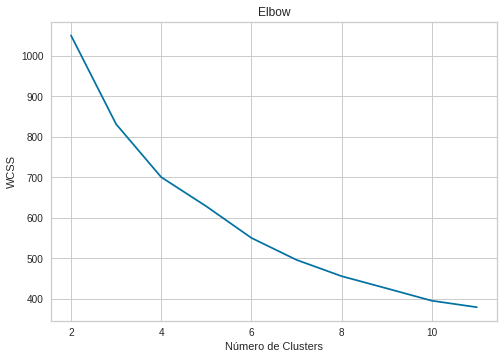

In [76]:
# agora podemos rodar a função elbow no dataframe padronizado

elbow(countries_scaled)

In [77]:
from yellowbrick.cluster import KElbowVisualizer

In [78]:
def elbow_yellow(values):
  kmeans = KMeans()
  visualizer = KElbowVisualizer(kmeans, k=(2, 12))
  visualizer.fit(countries_scaled)
  visualizer.show()

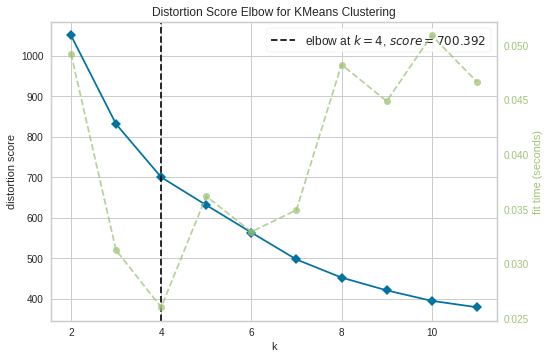

In [79]:
elbow_yellow(countries_scaled)

In [80]:
# método calinski_harabasz

def elbow_ch(values):
  kmeans = KMeans()
  visualizer = KElbowVisualizer(kmeans, k=(2,12), metric='calinski_harabasz')
  visualizer.fit(values)
  visualizer.show()

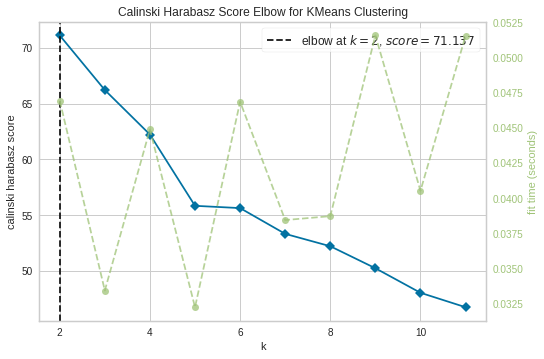

In [81]:
elbow_ch(countries_scaled)

In [82]:
# importando o método da silhoueta

from yellowbrick.cluster import SilhouetteVisualizer

In [83]:
# método da silhueta 

def sillhouette(values, k):
  kmeans = KMeans(k)
  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
  visualizer.fit(values)
  visualizer.show()

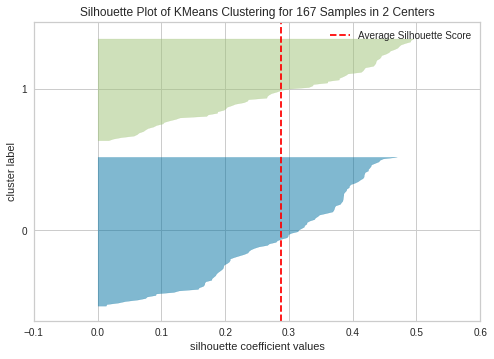

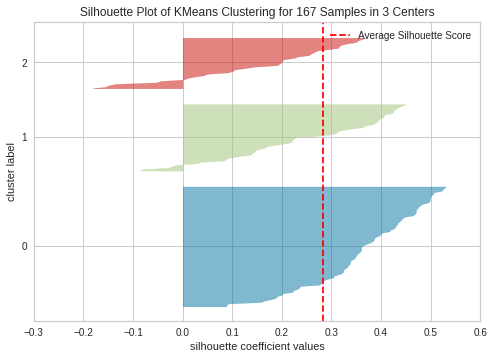

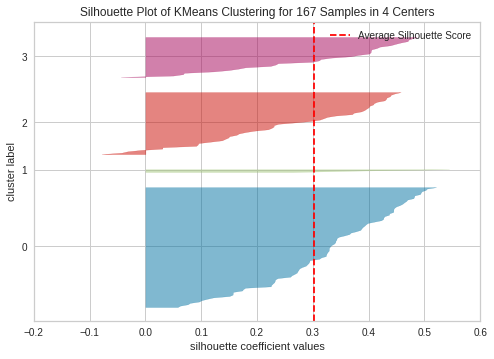

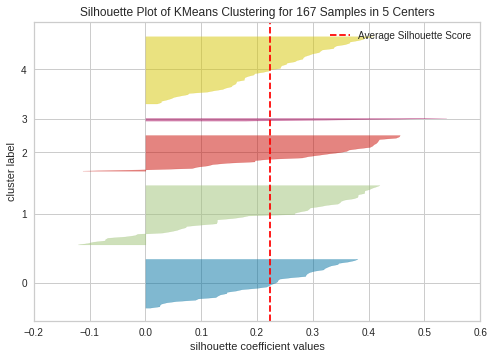

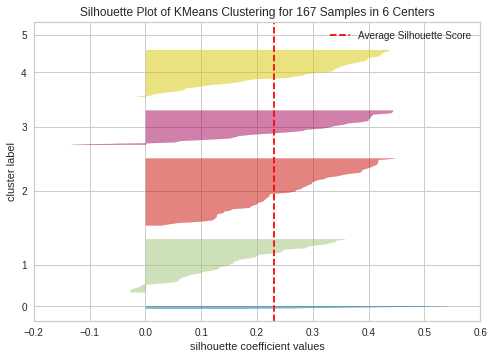

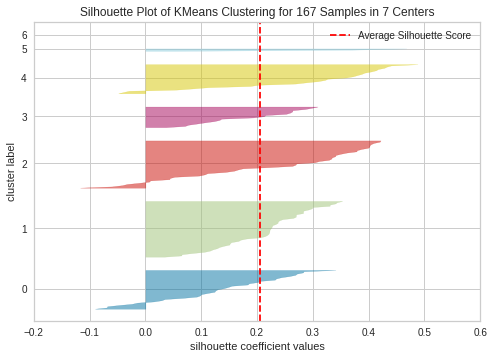

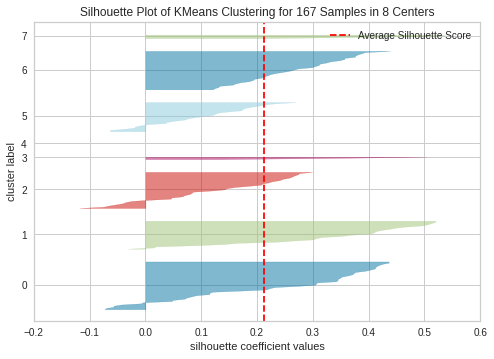

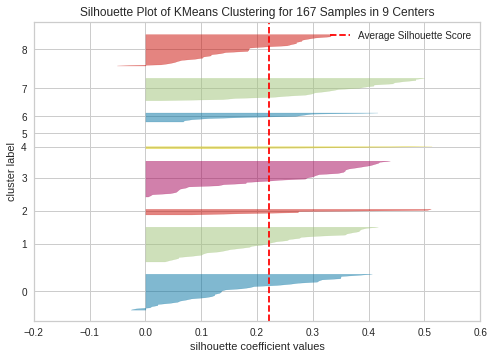

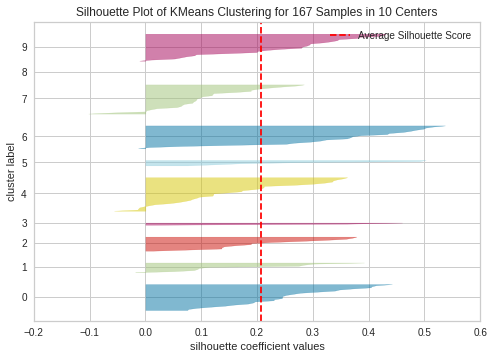

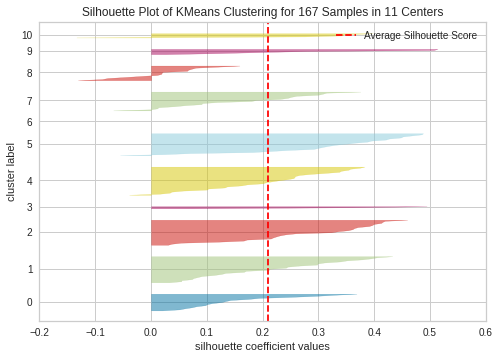

In [84]:
for i in range(2,12):
  sillhouette(countries_scaled, i)

## Utilizando o PCA para visualizar os gráficos das 9 dimensões

In [85]:
from yellowbrick.features import PCA

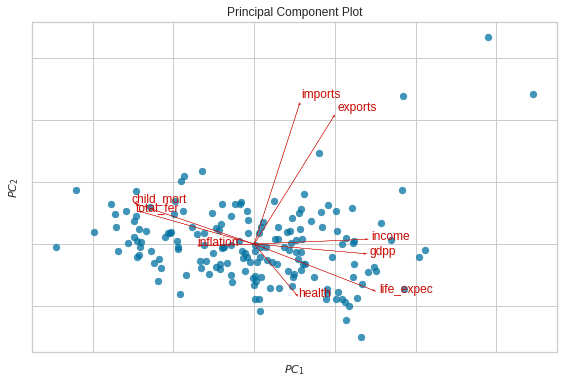

In [86]:
visualizer = PCA(proj_features=True)
visualizer.fit_transform(countries_scaled)
visualizer.show()

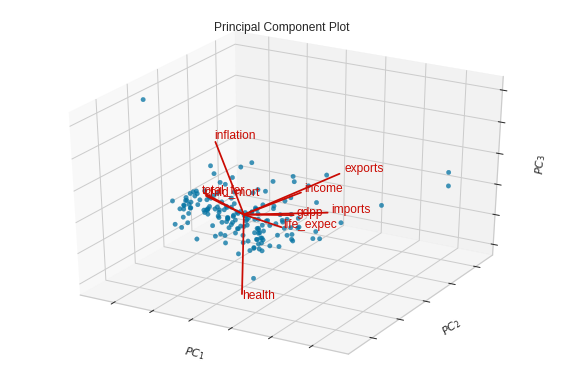

In [87]:
# podemos verificar em 3D também

visualizer = PCA(proj_features=True, projection=3)
visualizer.fit_transform(countries_scaled)
visualizer.show()

## Para aplicar o PCA de fato, podemos utilizar o Sklearn pois o Yellow Brick é apenas visualização.

In [88]:
from sklearn.decomposition import PCA

In [89]:
# instanciando o objeto

pca = PCA()

In [90]:
pca.fit(countries_scaled)
features = range(pca.n_components_)

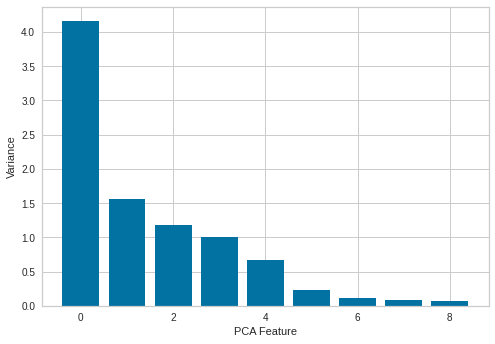

In [91]:
# agora que guardamos as features, podemos plotar o gráfico de barras com todas as features

plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.show()

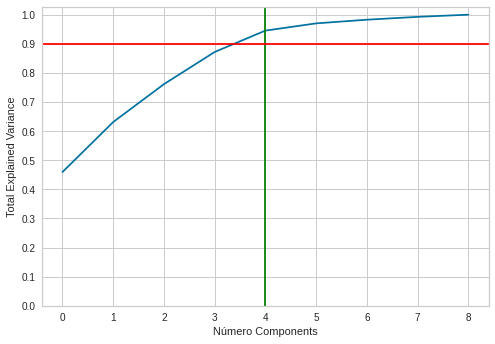

In [98]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)),
plt.xlabel('Número Components')
plt.ylabel('Total Explained Variance')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(4, c='green')
plt.axhline(0.9, c='red')
plt.show()

In [99]:
pca = PCA(n_components=4)
countries_pca = pca.fit_transform(countries_scaled)

In [100]:
countries_pca

array([[-2.91302459e+00,  9.56205755e-02, -7.18118495e-01,
         1.00525464e+00],
       [ 4.29911330e-01, -5.88155666e-01, -3.33485505e-01,
        -1.16105859e+00],
       [-2.85225077e-01, -4.55174413e-01,  1.22150481e+00,
        -8.68114503e-01],
       [-2.93242265e+00,  1.69555507e+00,  1.52504374e+00,
         8.39625014e-01],
       [ 1.03357587e+00,  1.36658709e-01, -2.25720917e-01,
        -8.47062687e-01],
       [ 2.24072616e-02, -1.77918658e+00,  8.69997116e-01,
        -3.69668667e-02],
       [-1.01583737e-01, -5.68251724e-01,  2.42091816e-01,
        -1.46626576e+00],
       [ 2.34216461e+00, -1.98845915e+00,  1.90344188e-01,
         1.10503778e+00],
       [ 2.97376366e+00, -7.34688659e-01, -5.19766356e-01,
         1.20544210e+00],
       [-1.81486997e-01, -4.02865873e-01,  8.67458743e-01,
        -4.38772983e-01],
       [ 1.26874386e+00, -6.56588363e-01, -4.88097616e-01,
         5.56335553e-02],
       [ 1.67099640e+00,  5.61162493e-01,  9.91258303e-01,
      

In [106]:
df_countries_pca = pd.DataFrame(countries_pca, columns=(['PC0', 'PC1', 'PC2', 'PC4']))
df_countries_pca 

,PC0,PC1,PC2,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


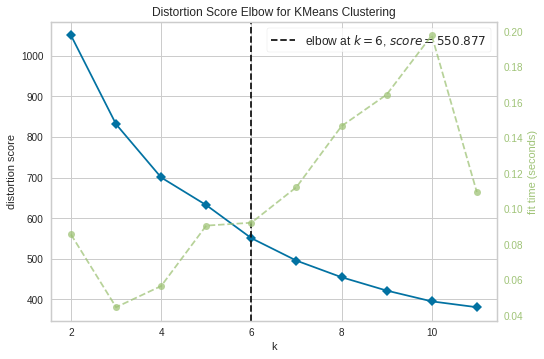

In [109]:
# método do elbow informando clusters

elbow_yellow(countries_pca)

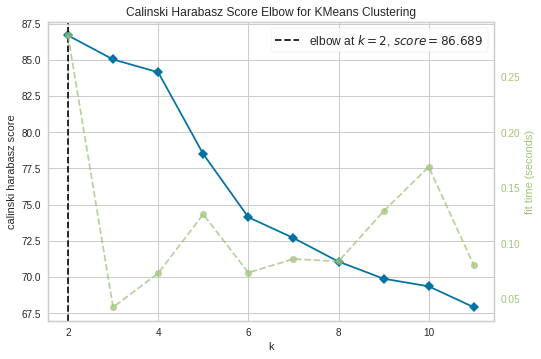

In [111]:
# método da silhueta (calisnki harabasz) 

elbow_ch(countries_pca)

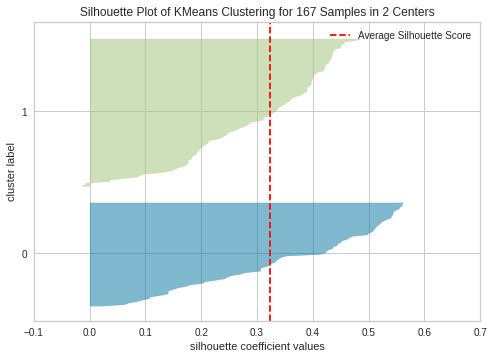

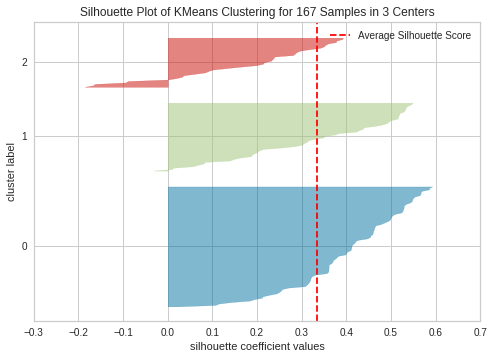

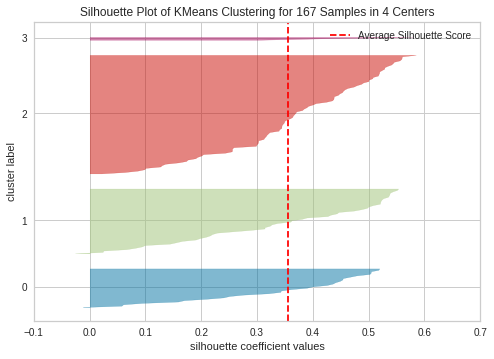

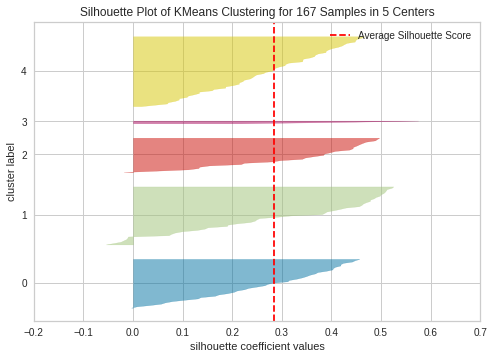

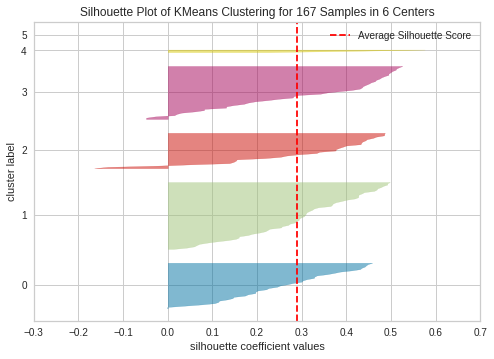

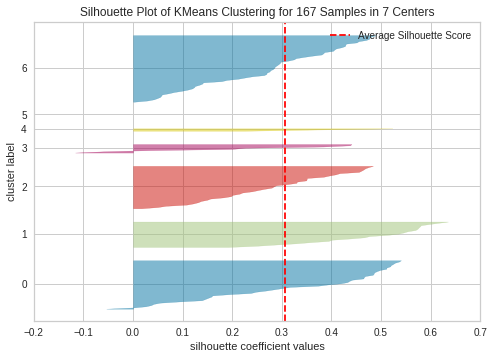

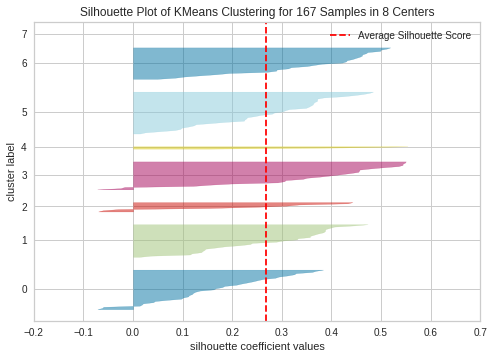

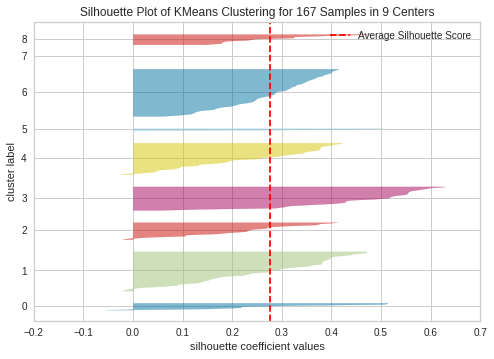

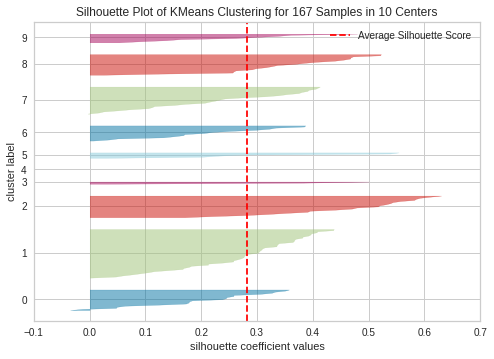

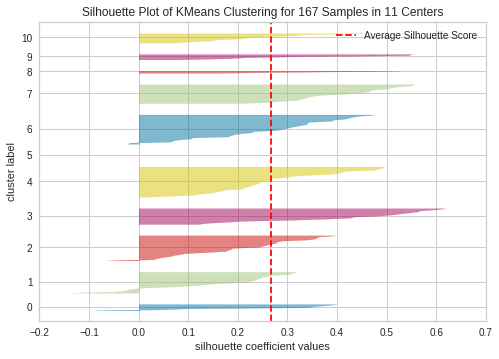

In [112]:
for i in range(2,12):
  sillhouette(countries_pca, i)

In [113]:
kmeans = KMeans(n_clusters=3)

In [114]:
yKmeans = kmeans.fit_predict(countries_pca)

In [115]:
yKmeans

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [116]:
country['cluster'] = yKmeans
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


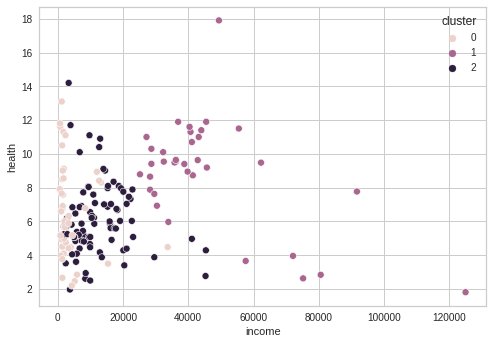

In [117]:
sns.scatterplot(x='income', y='health', data=country, hue='cluster')
plt.show()

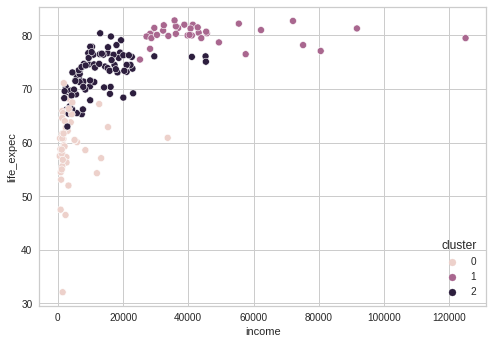

In [118]:
sns.scatterplot(x='income', y='life_expec', data=country, hue='cluster')
plt.show()

In [163]:
# verificando com 4 clusters

kmeans = KMeans(n_clusters=3)
yKmeans = kmeans.fit_predict(countries_pca)
yKmeans

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [165]:
country['cluster'] = yKmeans

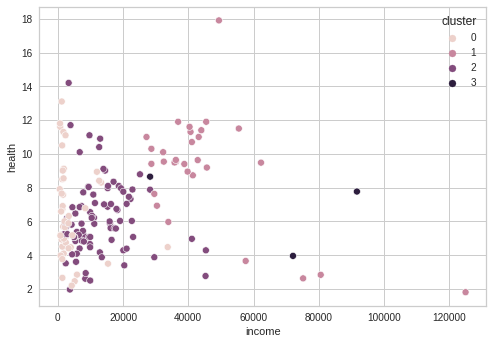

In [162]:
sns.scatterplot(x='income', y='health', data=country, hue='cluster')
plt.show()

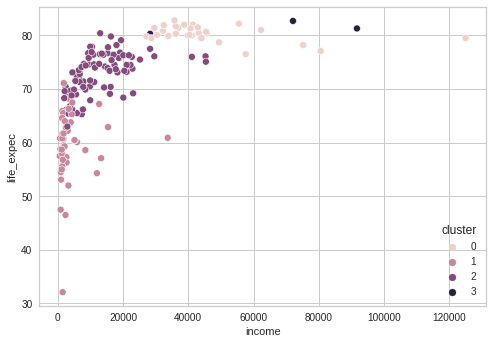

In [122]:
sns.scatterplot(x='income', y='life_expec', data=country, hue='cluster')
plt.show()

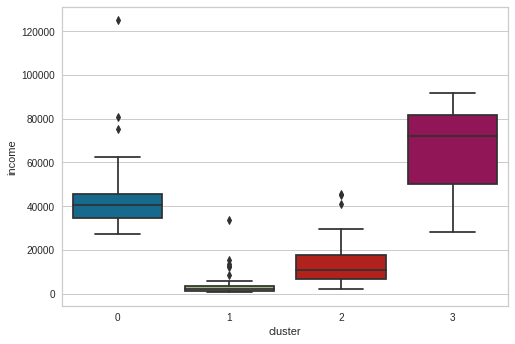

In [123]:
# visualizando com boxplot

sns.boxplot(x='cluster', y='income', data=country)
plt.show()

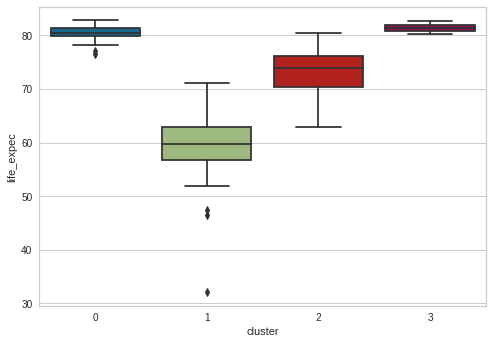

In [124]:
# visualizando com boxplot

sns.boxplot(x='cluster', y='life_expec', data=country)
plt.show()

## Conjuntos de clusters hierárquicos

In [126]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

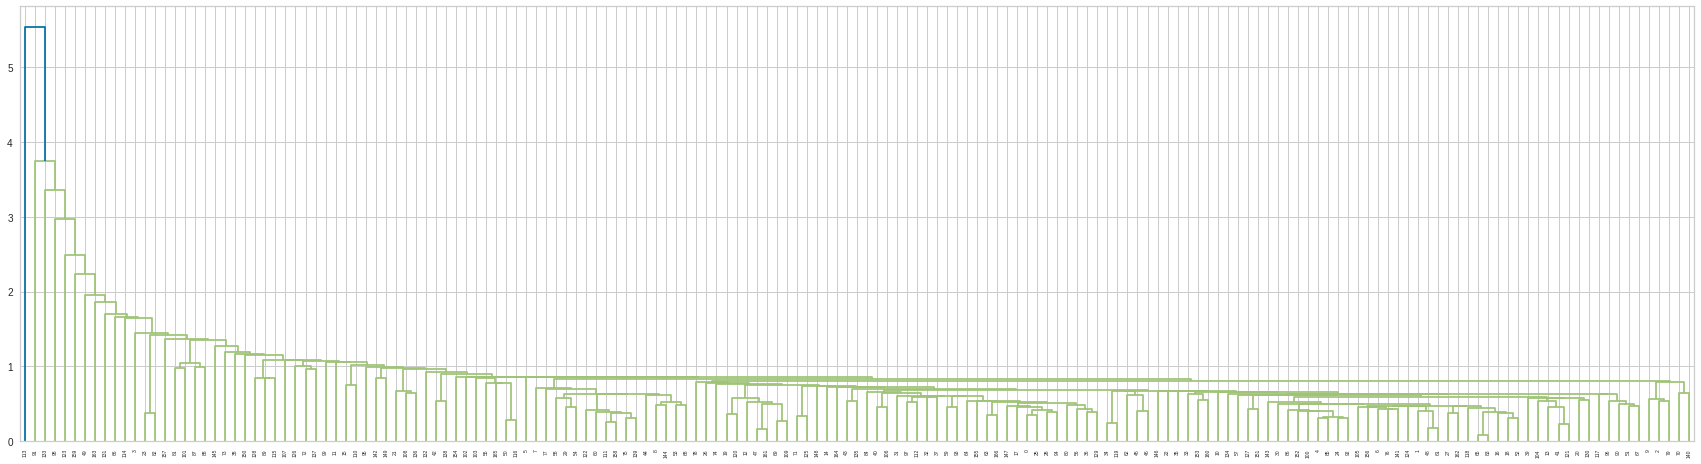

In [131]:
# plotando o endograma

plt.figure(figsize=(30, 8))
dend = sch.dendrogram(sch.linkage(countries_pca, method='single'))
plt.show()

## Método da Ligação Completa

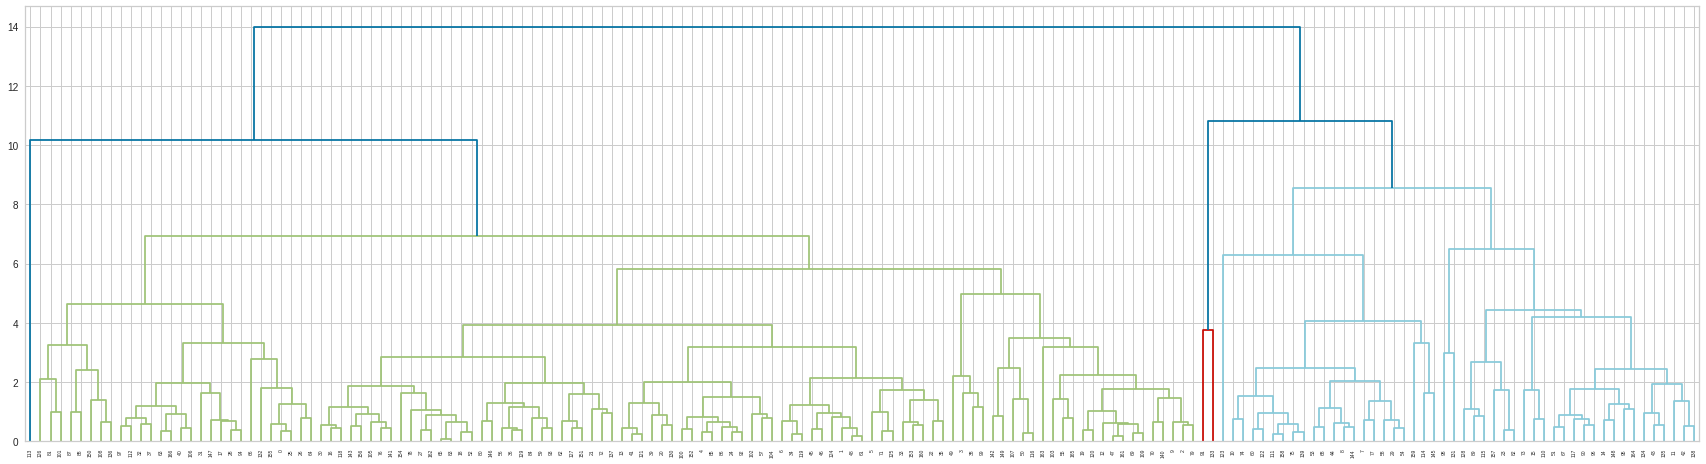

In [132]:
plt.figure(figsize=(30, 8))
dend = sch.dendrogram(sch.linkage(countries_pca, method='complete'))
plt.show()

## Média

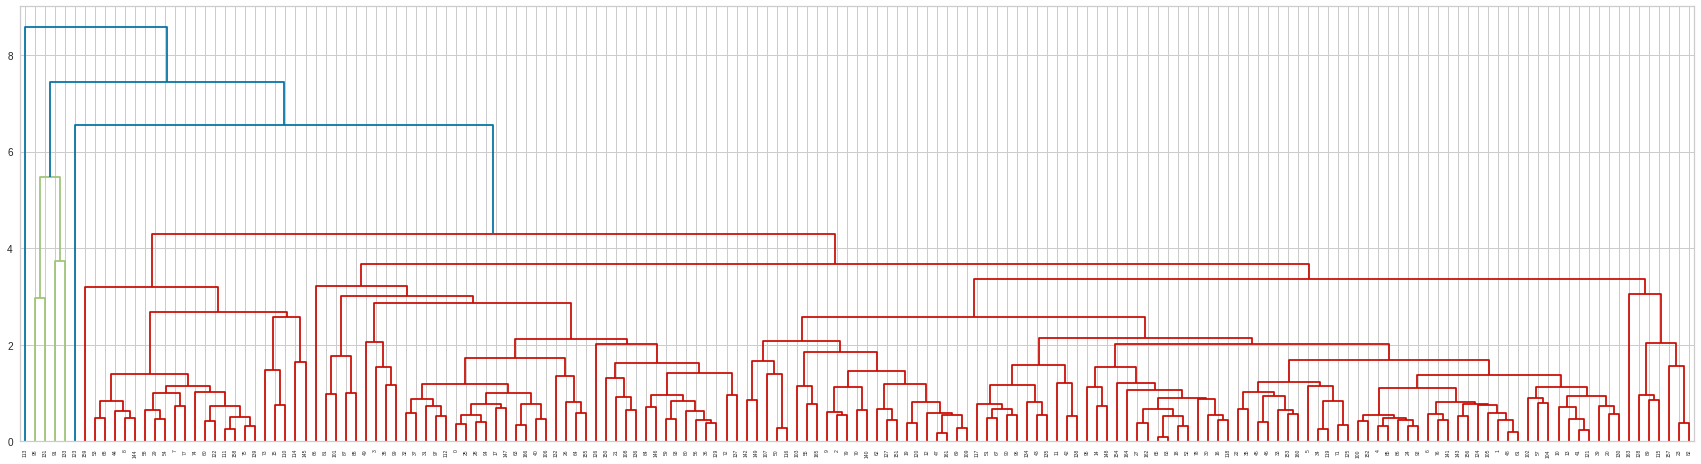

In [133]:
plt.figure(figsize=(30, 8))
dend = sch.dendrogram(sch.linkage(countries_pca, method='average'))
plt.show()

## Ward

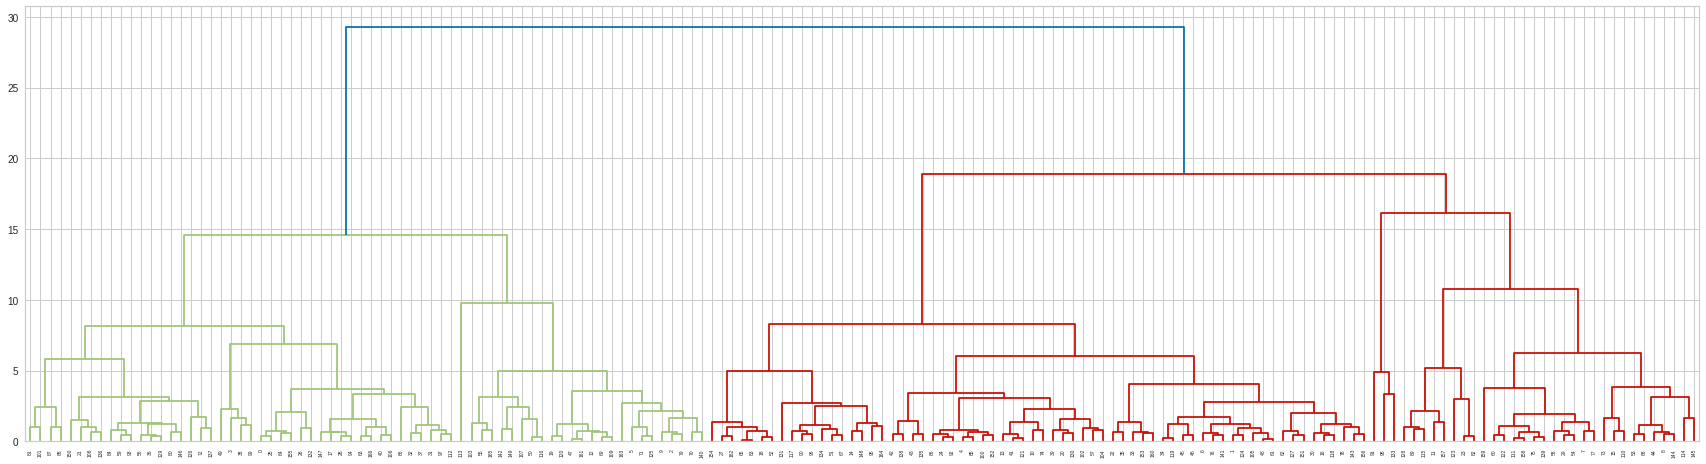

In [134]:
plt.figure(figsize=(30, 8))
dend = sch.dendrogram(sch.linkage(countries_pca, method='ward'))
plt.show()

## Agora vamos utilizar o algoritmo Agglomerative Cluster

In [169]:
AC = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

In [170]:
YHat = AC.fit_predict(countries_pca)

In [171]:
country['cluster_h'] = YHat

## Criando novos plots com os novos dados

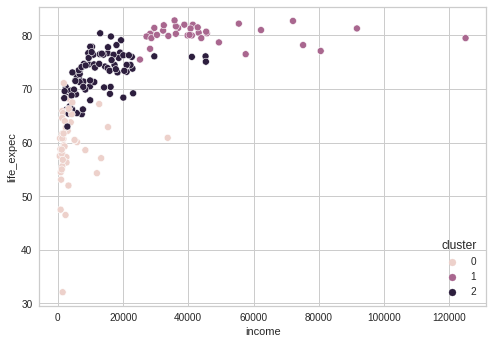

In [168]:
# plot do kmeans

sns.scatterplot(x='income', y='life_expec', data=country, hue='cluster')
plt.show()

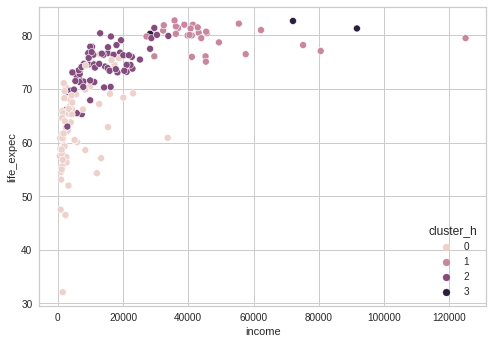

In [172]:
# colorindo pelo cluster hierárquico

sns.scatterplot(x='income', y='life_expec', data=country, hue='cluster_h')
plt.show()

In [175]:
country['cluster_h'].value_counts()

0    68
2    66
1    30
3     3
Name: cluster_h, dtype: int64

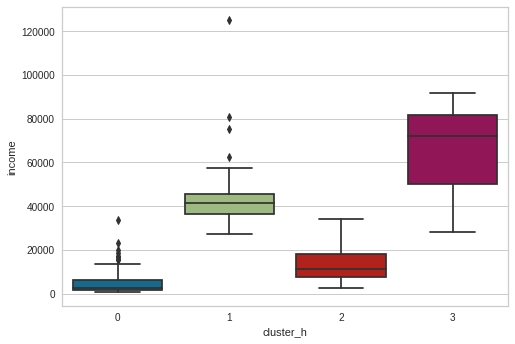

In [176]:
sns.boxplot(x='cluster_h', y='income', data=country)
plt.show()

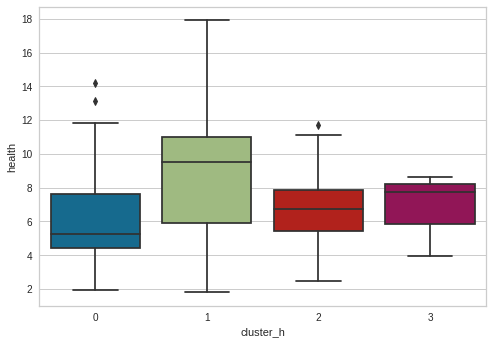

In [177]:
sns.boxplot(x='cluster_h', y='health', data=country)
plt.show()

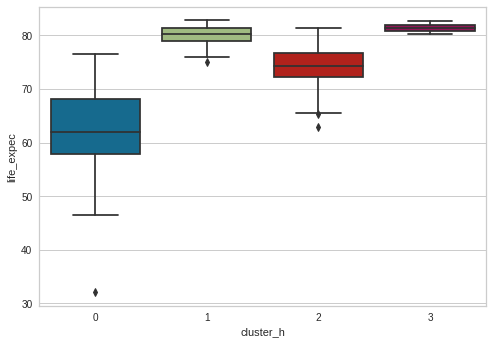

In [178]:
sns.boxplot(x='cluster_h', y='life_expec', data=country)
plt.show()

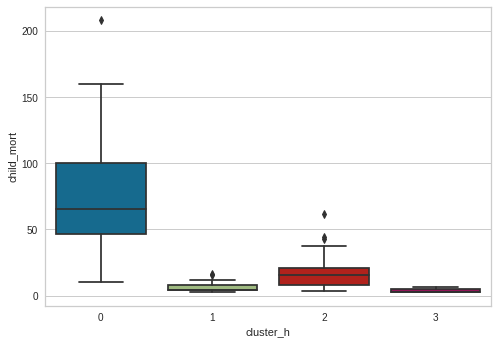

In [179]:
sns.boxplot(x='cluster_h', y='child_mort', data=country)
plt.show()

In [180]:
country[country['cluster_h']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_h
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1,3
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,1,3
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1,3


In [182]:
country[country['cluster_h']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_h
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,2,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
155,Uganda,81.0,17.1,9.01,28.6,1540,10.60,56.8,6.15,595,0,0
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,2,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,0


In [187]:
country[country['cluster']==2].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_h
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0,84.000000
mean,21.695238,40.484393,6.158333,47.112689,12773.690476,7.608405,72.984524,2.282738,6717.523810,2.0,1.476190
std,13.816900,19.271103,2.155652,19.760336,8680.231908,7.849052,3.780498,0.663623,5222.016779,0.0,0.856952
min,4.500000,0.109000,1.970000,0.065900,1990.000000,-4.210000,63.000000,1.250000,592.000000,2.0,0.000000
25%,11.425000,26.750000,4.855000,32.150000,6707.500000,2.367500,70.375000,1.750000,2970.000000,2.0,1.000000
50%,18.100000,37.300000,5.875000,48.650000,10450.000000,5.805000,73.750000,2.215000,4850.000000,2.0,2.000000
75%,27.750000,51.450000,7.150000,60.225000,17175.000000,10.025000,76.100000,2.652500,9377.500000,2.0,2.000000
max,64.400000,93.800000,14.200000,108.000000,45400.000000,45.900000,80.400000,4.340000,28000.000000,2.0,2.000000


In [188]:
country[country['cluster']==0].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_h
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.0
mean,91.610417,29.571042,6.433542,43.133333,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.0,0.0
std,34.319855,18.200215,2.651959,18.418658,5590.168621,15.362485,6.384914,1.036192,2925.911009,0.0,0.0
min,28.100000,2.200000,2.200000,17.200000,609.000000,0.885000,32.100000,2.590000,231.000000,0.0,0.0
25%,63.675000,17.025000,4.525000,29.900000,1390.000000,4.080000,56.725000,4.475000,551.500000,0.0,0.0
50%,89.750000,24.350000,5.675000,41.500000,1860.000000,8.855000,59.800000,5.055000,932.000000,0.0,0.0
75%,111.000000,39.400000,8.327500,50.025000,3522.500000,16.600000,62.825000,5.597500,1465.000000,0.0,0.0
max,208.000000,85.800000,13.100000,101.000000,33700.000000,104.000000,71.100000,7.490000,17100.000000,0.0,0.0
